In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [45]:
data = pd.read_csv('BTC-USD.csv')
data_training = data[data['Date']< '2020-01-01'].copy()
data_test = data[data['Date']< '2020-01-01'].copy()
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [46]:
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])

In [15]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
 X_train.append(training_data[i-60:i])
 Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(1872, 60, 5)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [9]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20


2022-08-24 13:09:32.515189: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


34/34 [==============================] - 6s 115ms/step - loss: 0.0197 - val_loss: 0.0042
Epoch 2/20
34/34 [==============================] - 4s 105ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 3/20
34/34 [==============================] - 4s 115ms/step - loss: 0.0048 - val_loss: 0.0036
Epoch 4/20
34/34 [==============================] - 4s 119ms/step - loss: 0.0043 - val_loss: 0.0077
Epoch 5/20
34/34 [==============================] - 4s 124ms/step - loss: 0.0037 - val_loss: 0.0047
Epoch 6/20
34/34 [==============================] - 4s 120ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 7/20
34/34 [==============================] - 4s 113ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 8/20
34/34 [==============================] - 4s 115ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 9/20
34/34 [==============================] - 4s 114ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 10/20
34/34 [==============================] - 4s 115ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 11/2

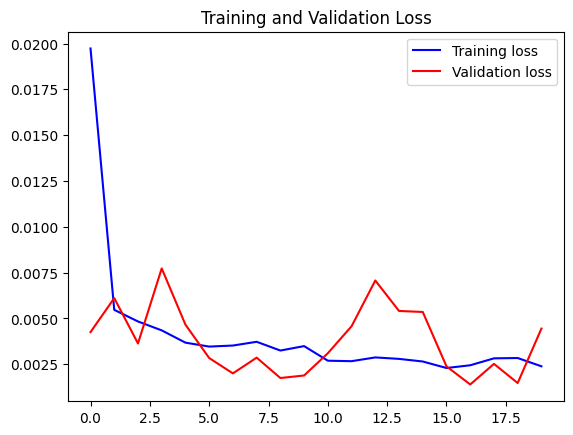

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [28]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

/var/folders/5z/wlsdnlqx449856gv2wqsq4140000gn/T/ipykernel_42531/4162481076.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,21242676385
1,9324.787109,9379.806641,9141.251953,9235.354492,21132220847
2,9235.607422,9505.051758,9191.485352,9412.612305,26170255634
3,9413.004883,9457.417969,9256.931641,9342.527344,26198609048
4,9340.864258,9423.237305,9305.909180,9360.879883,23133895765


In [36]:
inputs = scaler.transform(df)

In [38]:
inputs.shape

(1992, 5)

In [40]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test) 
Y_pred = model.predict(X_test)

61/61 [==============================] - 1s 20ms/step


In [41]:
Y_pred, Y_test
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [42]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred
 

array([[8305.063],
       [8209.502],
       [7998.704],
       ...,
       [8316.244],
       [8315.001],
       [8312.008]], dtype=float32)

In [43]:
Y_test

array([ 288.96701115,  279.96298214,  247.20599413, ..., 7140.75046167,
       7243.37594972, 7117.54196566])

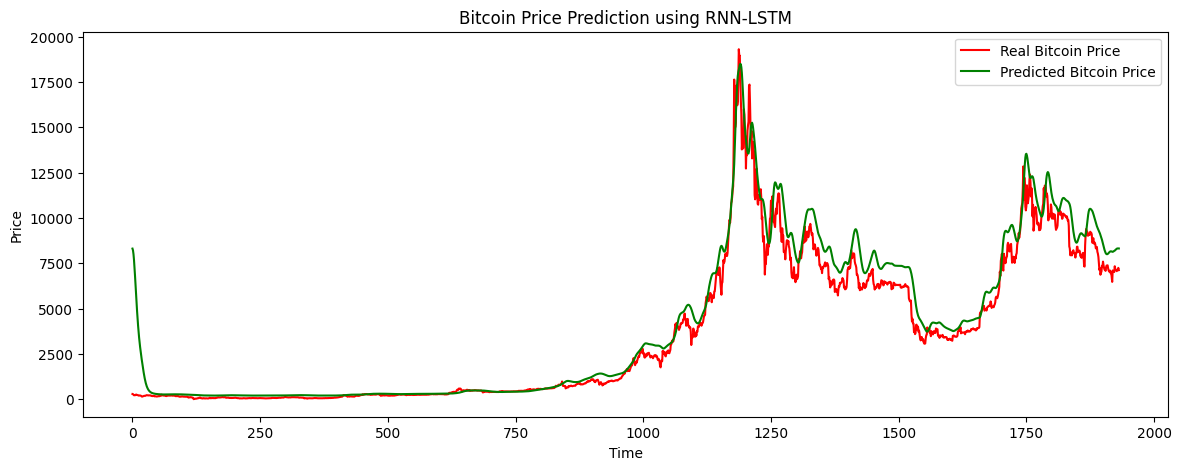

In [44]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()